# Problem Set 5

## Group Members: Kaylin Kleckner, Julia Bruner, Amanda Markee

### Problem 1

### Problem 4

Using the LifeExpectancy data in the country table on the y-axis, plot this data against some other value.

Suggestions for the x-axis: GNP, Population or IndepYear could be interesting, but up to you.
I'd suggest using `SQLAlchemy`, get the data and make either a dataframe or numpy arrays and then use `matplotlib` to plot.


First, load in country table from `world.sqlite` database

In [44]:
#!/usr/bin/env python
from sqlalchemy import create_engine
from sqlalchemy import MetaData
from sqlalchemy import Table, Column
from sqlalchemy import Integer, String
from sqlalchemy import sql, select, join, desc
from sqlalchemy import func

# Create an Engine obect which is our handle into the database
engine = create_engine('sqlite:////blue/bsc4452/kaylin.k/Class_Files/data/world.sqlite')

# Connect to the database
conn = engine.connect()

# Read the metadata from the existing database.
# Since the database already exists, and has tables defined, we can create Python objects based on these automatically.
DBInfo = MetaData(engine)

In [43]:
# Auto-create the city object basedon the metadata read into the DBInfo.
country=Table('country', DBInfo, autoload=True)

In [3]:
type(country) # Check table is loaded

sqlalchemy.sql.schema.Table

I opened SQLite in the command line to see table structure. These were the commands used:

`module load sqlite`
`sqlite3 world.sqlite`
`.tables`
`.schema country`

Next, I ran a test query with only 10 rows of the columns I wanted. 

In [40]:
# Mirroring this command: SELECT Id, Name, Population FROM city LIMIT 10;
# city.c.ID where city = object, c = column, and ID = column name
query = select([country.c.Code, country.c.Name, country.c.Continent, country.c.GNP, country.c.LifeExpectancy]).limit(10)
result = conn.execute(query)
for row in result:
    print(row)

('ABW', 'Aruba', 'North America', Decimal('828.0000000000'), Decimal('78.4000000000'))
('AFG', 'Afghanistan', 'Asia', Decimal('5976.0000000000'), Decimal('45.9000000000'))
('AGO', 'Angola', 'Africa', Decimal('6648.0000000000'), Decimal('38.3000000000'))
('AIA', 'Anguilla', 'North America', Decimal('63.2000000000'), Decimal('76.1000000000'))
('ALB', 'Albania', 'Europe', Decimal('3205.0000000000'), Decimal('71.6000000000'))
('AND', 'Andorra', 'Europe', Decimal('1630.0000000000'), Decimal('83.5000000000'))
('ANT', 'Netherlands Antilles', 'North America', Decimal('1941.0000000000'), Decimal('74.7000000000'))
('ARE', 'United Arab Emirates', 'Asia', Decimal('37966.0000000000'), Decimal('74.1000000000'))
('ARG', 'Argentina', 'South America', Decimal('340238.0000000000'), Decimal('75.1000000000'))
('ARM', 'Armenia', 'Asia', Decimal('1813.0000000000'), Decimal('66.4000000000'))


After confirming query structure, I ran a second query with all rows.

In [11]:
query2 = select([country.c.Code, country.c.Name, country.c.Continent, country.c.GNP, country.c.LifeExpectancy])
result2 = conn.execute(query)
#don't print using for loop, too many rows

I converted the query into a dataframe.

In [12]:
import pandas as pd #load pandas module

df=pd.read_sql(query2, conn) #create dataframe from query2 above

df.head() #check dataframe structure 

,Code,Name,Continent,GNP,LifeExpectancy
0,ABW,Aruba,North America,828.0,78.4
1,AFG,Afghanistan,Asia,5976.0,45.9
2,AGO,Angola,Africa,6648.0,38.3
3,AIA,Anguilla,North America,63.2,76.1
4,ALB,Albania,Europe,3205.0,71.6


Lastly, I graphed average life expectancy by continent with the `plotnine` module.

/apps/python/3.10/lib/python3.10/site-packages/plotnine/layer.py:334: PlotnineWarning: stat_boxplot : Removed 17 rows containing non-finite values.
/apps/python/3.10/lib/python3.10/site-packages/plotnine/layer.py:412: PlotnineWarning: geom_jitter : Removed 17 rows containing missing values.


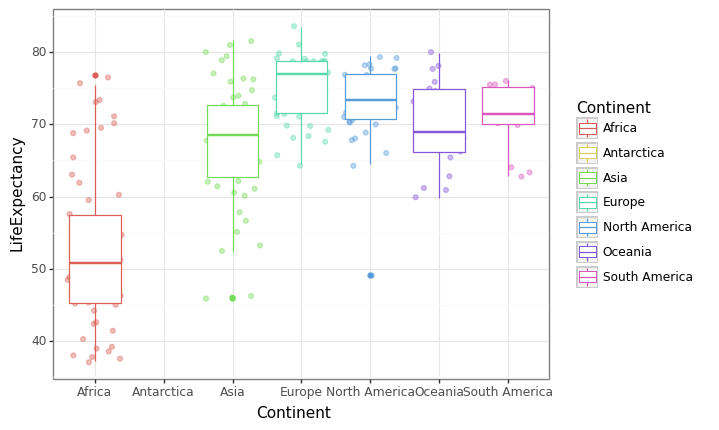

<ggplot: (2935564235650)>

In [41]:
import plotnine as pn #load plotnine module. we love ggplot2 :,)

(
    pn.ggplot(df) #assign dataframe
    + pn.aes(x="Continent", y="LifeExpectancy", color="Continent") #Set axis values and color
    + pn.geom_jitter(alpha = 0.4) #Show raw data points behind boxplots. Adjust transparency with alpha value
    + pn.geom_boxplot() #create boxplots
    + pn.theme_bw() #clean up graph with black and white theme
)